In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from random import randint

In [15]:
import os
os.chdir('C:\\Users\\PC\\\Downloads')
df = pd.read_csv('cover.csv')

In [55]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [16]:
df.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [17]:
df.Soil_Type_4.value_counts()

0    579415
1      1597
Name: Soil_Type_4, dtype: int64

In [18]:
data = df.copy()

In [19]:
data = data[data.Cover_Type.isin([1, 2])]
data = data.reset_index()
data.drop('index', axis = 1, inplace=True)


In [20]:
data.Soil_Type_4.value_counts()

0    495141
Name: Soil_Type_4, dtype: int64

In [21]:
len(data)

495141

In [22]:
def LogisticMaker(data):
    if data==1:
        data=0
    elif data==2:
        data=1
    
    
    return data



In [23]:
data.Cover_Type = data.Cover_Type.apply(LogisticMaker)

In [24]:
data.Cover_Type.value_counts()

1    283301
0    211840
Name: Cover_Type, dtype: int64

In [25]:
def DataNormalizer(data, columns):
    for column in columns:
        mini = data[column].min()
        maxi = data[column].max()
        ave = data[column].mean()
        if len(data[column].unique()) > 2:
            data[column] = (data[column]-ave)/(maxi-mini)
        

    return data


DataNormalizer(data, data.loc[:, data.columns != 'Cover_Type'])


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,-0.133291,-0.041125,-0.066202,-0.005663,0.026758,0.094308,0.082461,0.053090,-0.032933,0.560551,...,0,0,0,0,0,0,0,0,0,1
1,-0.145597,0.003319,0.070161,-0.024274,0.095233,0.081662,0.098209,0.053090,-0.084114,0.573098,...,0,0,0,0,0,0,0,0,0,1
2,-0.279017,-0.060570,-0.111657,0.017243,-0.076601,-0.343096,0.066713,0.049153,-0.013248,0.548004,...,0,0,0,0,0,0,0,0,0,1
3,-0.080182,-0.007792,-0.035899,0.068066,-0.023630,0.385582,0.082461,0.060964,-0.028996,0.271968,...,0,0,0,0,0,0,0,0,0,1
4,-0.173447,-0.055014,0.130767,-0.090130,0.031926,0.099226,0.137580,-0.002029,-0.202224,0.556368,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495136,-0.254405,-0.346681,-0.005596,0.081667,0.108153,-0.060111,0.007658,-0.053210,-0.052618,-0.210257,...,0,0,0,0,0,0,0,0,0,1
495137,-0.256348,-0.368903,-0.005596,0.073793,0.104277,-0.064326,-0.008090,-0.049273,-0.032933,-0.206632,...,0,0,0,0,0,0,0,0,0,1
495138,-0.257644,-0.380014,-0.005596,0.068066,0.101693,-0.068542,-0.019901,-0.053210,-0.021122,-0.203007,...,0,0,0,0,0,0,0,0,0,1
495139,-0.258939,-0.382792,0.009555,0.063771,0.084897,-0.072757,-0.019901,-0.053210,-0.021122,-0.199243,...,0,0,0,0,0,0,0,0,0,1


In [26]:
data.Soil_Type_4.unique()

array([0], dtype=int64)

In [27]:
data.Cover_Type.value_counts()

1    283301
0    211840
Name: Cover_Type, dtype: int64

In [28]:
x0 = [1]*(len(data))
y = data['Cover_Type']

X = data[data.columns[:-1]].values


In [29]:
X = np.insert(X, 0, 1, axis=1)

In [30]:
X.shape

(495141, 55)

In [31]:
numbers = []
for i in range(len(data.columns)):
    numbers.append(randint(1, 10))
W = np.array(numbers)

In [32]:
W

array([10,  5, 10,  8,  9,  9,  4,  6,  9,  9,  8,  6, 10,  6,  5,  8, 10,
        7,  1,  4,  4, 10,  8,  3,  6, 10, 10,  8,  1,  4,  8,  5,  9,  4,
        5,  7,  6,  9,  7, 10,  9,  3,  7,  6,  7,  1,  6,  6, 10,  8,  1,
        4,  9,  6,  6])

In [33]:
X

array([[ 1.        , -0.13329128, -0.04112532, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.14559698,  0.00331913, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.27901667, -0.06056976, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.25764361, -0.38001421, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.25893895, -0.38279198, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.26023428, -0.36334754, ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
len(X)

495141

In [35]:
y

0         1
1         1
2         1
3         1
4         1
         ..
495136    1
495137    1
495138    1
495139    1
495140    1
Name: Cover_Type, Length: 495141, dtype: int64

In [36]:
def costFunction(y, h):
    return (-y * np.log(h) - (1-y)*np.log(1-h)).mean()
    

In [37]:
def sigmaoid(z):
    res = 1.0/(1+np.exp(-z))
    
    return res

In [38]:
def probabilityOfAdmitted(X, W):
    val = np.dot(X, W)
    p = sigmaoid(val)
    
    return p

In [39]:
def predict(X, W):
    p = probabilityOfAdmitted(X, W)
    
    p [p>=0.5] = 1
    p [p<0.5] = 0
    
    return p

In [40]:
W.shape

(55,)

In [41]:
def gradientDescent(X, y, W, alpha = 0.01, iterations = 40000):
    costH = []
    
    for i in range(iterations+1):
        x = np.dot(X, W)
        h = sigmaoid(x)
       
        g = np.dot(X.T, (h-y))/len(y)
        W = W - alpha*g
        
            
        cost = costFunction(y, h)
        costH.append(cost)
        
        if i%1000==0:
            print(f'Iteration: {i}')
            print(cost) 
        
        
    return W, costH

In [42]:
W2, cost = gradientDescent(X, y, W)

C:\Users\PC\AppData\Local\Temp\ipykernel_3772\3494969971.py:2: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1-y)*np.log(1-h)).mean()


Iteration: 0
inf
Iteration: 1000
7.063969943374853
Iteration: 2000
4.372545124175045
Iteration: 3000
2.8306973431433815
Iteration: 4000
2.3654251071304935
Iteration: 5000
2.1420577368020526
Iteration: 6000
1.969817871989043
Iteration: 7000
1.8189627551536869
Iteration: 8000
1.6840486865879576
Iteration: 9000
1.5631837923647816
Iteration: 10000
1.4550137867629136
Iteration: 11000
1.358307623546191
Iteration: 12000
1.2719194267034588
Iteration: 13000
1.1948121531732179
Iteration: 14000
1.1260780598065194
Iteration: 15000
1.0649324589020057
Iteration: 16000
1.010681626725378
Iteration: 17000
0.9626801903154202
Iteration: 18000
0.9202965122560203
Iteration: 19000
0.8829002516863094
Iteration: 20000
0.8498736625234061
Iteration: 21000
0.8206346734078536
Iteration: 22000
0.7946573937673993
Iteration: 23000
0.7714828125156729
Iteration: 24000
0.7507198305988684
Iteration: 25000
0.7320399783432171
Iteration: 26000
0.7151691994653974
Iteration: 27000
0.699879003337706
Iteration: 28000
0.6859782

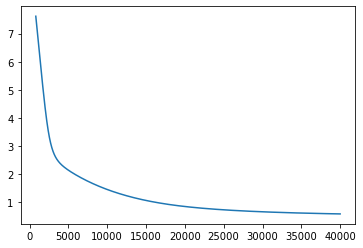

In [44]:
plt.plot(cost)

In [45]:
test_X = data[2429:2430][data.columns[:-1]].values

In [46]:
test_X = np.insert(test_X, 0, 1, axis=1)

In [47]:
W

array([10,  5, 10,  8,  9,  9,  4,  6,  9,  9,  8,  6, 10,  6,  5,  8, 10,
        7,  1,  4,  4, 10,  8,  3,  6, 10, 10,  8,  1,  4,  8,  5,  9,  4,
        5,  7,  6,  9,  7, 10,  9,  3,  7,  6,  7,  1,  6,  6, 10,  8,  1,
        4,  9,  6,  6])

In [48]:
test_X

array([[ 1.        , -0.07500112, -0.22445865,  0.13076731, -0.10659368,
        -0.05980562, -0.12067033,  0.1021465 , -0.1280128 , -0.28096423,
        -0.11991787,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [49]:
predict(test_X, W)

array([1.])

In [50]:
W2

array([-6.68968184, -5.56132174, -0.40383115,  7.26757449,  2.36943525,
        6.27389416, -0.44439514,  8.04008903,  7.23322602,  4.90223302,
        2.08128258,  1.35131305,  1.65834752,  2.11558545,  5.18507213,
        8.        , 10.00862237,  7.03006641,  2.34999145,  4.        ,
        4.09701142, 10.0002396 ,  7.97086328,  3.68646592,  7.02709416,
        9.66058403,  8.5637101 ,  6.89623408,  1.        ,  4.        ,
        7.73012332,  5.2803145 ,  8.9675729 ,  4.25652928,  5.43725764,
        6.51684763,  3.96588004,  5.10680667,  4.82666187,  9.89952125,
        8.80441096,  2.8572665 ,  7.01765586,  6.08187981,  6.38834633,
        4.50866562,  5.06084335,  4.50246023,  9.92722662,  7.37077964,
        1.0173342 ,  4.        ,  5.09651003,  3.50292125,  3.89561984])

In [51]:
data[2429:2430].Cover_Type

2429    1
Name: Cover_Type, dtype: int64

In [52]:
def accurracy_score(data, W):
    predictions = predict(X, W2)
    actual = data.Cover_Type.values
    true_predictions = np.sum(predictions==actual)
    
    
            
    score = true_predictions/len(data)
    
    return score

In [53]:
data.Cover_Type.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
accurracy_score(data, W2)

0.6971145592871526